# Abstract

El presente abstract tiene como objetivo proporcionar una breve descripción del presente trabajo.

En base a un dataset que combina variables de una nómina, métricas de People Analytics y resultados de encuestas, nos proponemos analizar las renuncias en esta organización.

Surgen como principal objetivo poder entender que variables apalancan los niveles de renuncia.

Para esto buscaremos poder entender el perfil del colaborador que presenta una mayor probabilidad de renuncia y, adicionalmente determinar si los renunciantes son perfiles de valor para la compañia.

Una vez mapeado el perfil del “probable renunciante” y conforme vamos avanzando surgen preguntas a respondernos: los colaboradores que renuncian son los más valiosos, o nos conviene no tomar medidas para que sigan renuncian perfiles que no nos conviene mantener. 

O si por el contrario; los colaboradores que renunciam son los más valiosos, entender qué puede hacer la organización para evitar las salidas. 

Finalmente, nos preguntamos si la organización puede evitar las salidas, o si por el contrario es un comportamiento habitual en el sector o mercado, es decir realizando un bench podemos analizar si la organización está peor o mejor que la competencia, o el mercado.

Mi motivación el dataset en cuestión debiene de que actualemente estoy trabajando en el area de People Analytics; motivo por el cual me interesa profundizar en modelos relacionados con Recursos Humanos.


# Hipótesis

*   Podemos predecir si un colaborador tiene altas probabilidades de renunciar?
*   Determinar si los perfiles de colaboradores que renuncian son valiosos.





# Definición de Objetivo

Gestionar los niveles de renuncia de la empresa.

# Contexto Comercial

No todas las renuncias son perjudiciales para la empresa; la renuncia de colaboradores que no son valiosos, que no vienen performando satisfactoriamente, o que no estan comprometidos pueden ser salidas deseadas.

Las renuncias de los colaboradores valiosos, opuestos a los anteriores, son los que más nos deben preocupar. De aquí el interes en poder predecir la probabilidad de renuncia. Sin son recursos valiosos, la perdida va a estar dada por la pérdida del recurso en si, y por los costos y tiempos de conseguir su reemplazo.

# Problema Comercial

El análisis de los niveles de renuncia de organizaciones grandes requiere un estudio de la situación total de la empresa, para ver el comportamiento de todo el universo, y analizar las distintas dimensiones, areas, regiones, funciones, etc. Si este estudio sólo es realizado por las distintas direcciones, gerencias o regiones puede caerse en sesgos, puede subestimarse el tema debido a la cantidad de renuncias bajo su area de responsabilidad, etc.

De la misma manera las decisiones y acciones a implementar deberan ser consideradas desde una mirada totalizadora, aunque dependiendo del tema, puede requerir accionar sobre areas o funciones específicas.

Por esto un analisis total de la situacion es la forma optima de encarar su estudio.

# Contexto Analítico

El dataset cuyo origen es www.kaggle.com, contiene información de 15000 colaboradores; 66 variables, entre las cuales encontramos información de nómina, resultados de encuestas, y Kpis de People Analytics. 

En primer lugar analizamos y estudiamos el significado de las variables, en función a la información detallada para cada campo que nos brinda el repositorio.

Para este trabajo fuimos analizando las variables y su correlación con la variable left_Company, que es la que nos indica si el colaborador renunció. De esta manera recorrimos las variables descartando las que consideramos como de poca relevancia para el análisis, como ser: Departament, GEO, Rising_Star, Will_Relocate, Critical, Trending Perf, Talent_Level, Validated_Talent_Level, Percent_Remote, Work_accident, promotion_last_5years, Gender, LinkedIn_Hits, Emp_Work_Status, entre otras. No es que las descartemos, solo vemos que no se comportan como el driver principal para comenzar a analizar las renuncias. 

En contrapartida vemos que las siguientes variables muestran, como veremos a continuación un comportamiento interesante en relación a los niveles de renuncias: Role, EMP_Sat_OnPrem, EMP_Sat_Remote, number_project, time_spend_company, salary, Emp_Identity, Emp_Role, Emp_Position, Emp_Title, Sensor_StepCount, average_montly_hours, last_evaluation, y EMP_Engagement.

# Diccionario de Datos


A continuación una descripción de los campos más relevantes del dataset:


**left_Company:** Indica si el empleado renunció o no.

**Role:** El puesto o título del empleado.

**EMP_Sat_OnPrem (N):** Indicador de una encuesta que un tercero envió a los empleados, para situaciones presenciales.

**EMP_Sat_Remote(N):** Indicador de una encuesta que un tercero envió a los empleados, para situaciones Home Office.

**number_project:** El número de proyectos en los que trabaja el empleado a lo largo del año.

**time_spend_company:** Años de servicio.

**salary:** Grado salarial relativo (bajo, medio, alto).

**Emp_Identity:** Grado de identificación del empleado con la empresa.

**Emp_Role:** Cómo se identifica el empleado con la importancia de su rol en la empresa.

**Emp_Position:** Cómo se identifica el empleado con la importancia de su puesto en la empresa.

**Emp_Title:** Cómo se siente el empleado sobre su título.

**Sensor_StepCount:** Los dispositivos sensibles se utilizan para capturar ciertas actividades de los empleados. En este caso número de pasos.

**average_montly_hours:** El promedio de horas que trabaja el empleado.

**last_evaluation:** La puntuación en la última evaluación del empleado.

**EMP_Engagement (N):** Indicador de una encuesta que un tercero envió. Mide el compromiso y representa el sentimiento del empleado acerca de cómo se siente al participar en las actividades de la empresa.

# Análisis Exploratorio (EDA)

`Nota: la columna Men_Leave evidencia si el empleado masculino renunció o no renunció, pero detecté que el dataset contiene 2.538 registros NaN de un total de 7.403 Masculino, por eso realizamos la limpieza de esos datos.`

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd '/content/gdrive/MyDrive/DS'
dsM = pd.read_csv('dataset_04.csv',sep=',') #Importo
dsM.dropna(subset=['Men_Leave'], inplace=True) #Me quedo con los Masculinos sin NaN



/content/gdrive/MyDrive/DS


In [7]:
%cd '/content/gdrive/MyDrive/DS'
dsF = pd.read_csv('dataset_04.csv',sep=',') #importo
dsF = dsF[(dsF.Gender == "F")] #Me quedo con los Femeninos, que están todos ok.

ds1 = pd.merge(dsM, dsF, how='outer') # Hago un merge para unir los Masculinos y los Femeninos en un dataset final.

/content/gdrive/MyDrive/DS


Como se aprecia a continuación los resultados de las encuestas que miden el Engagement o compromiso parecen poder mostrar un comportamiento contundente en cuanto a su correlación con el nivel de renuncias. Todos los colaboradores cuyo Engagement era bajo renunciaron. 

Las variables: EMP_Engagement_1, EMP_Engagement_2, EMP_Engagement_3, EMP_Engagement_4, EMP_Engagement_5 representan los resultados de compromiso del colaborador en distintas instancias.

[Text(0.5, 1.0, 'Renuncias según nivel de Engagement (Enc_1)')]

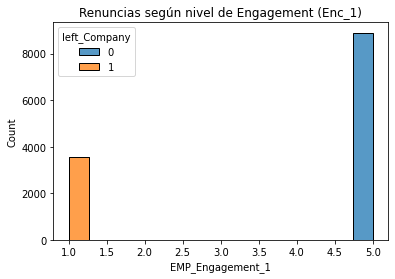

In [8]:
sns.histplot(data=ds1, x="EMP_Engagement_1", hue="left_Company", multiple="stack").set(title='Renuncias según nivel de Engagement (Enc_1)')

[Text(0.5, 1.0, 'Renuncias según nivel de Engagement (Enc_2)')]

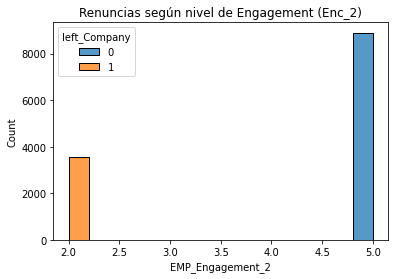

In [9]:
sns.histplot(data=ds1, x="EMP_Engagement_2", hue="left_Company", multiple="stack").set(title='Renuncias según nivel de Engagement (Enc_2)')

[Text(0.5, 1.0, 'Renuncias según nivel de Engagement (Enc_3)')]

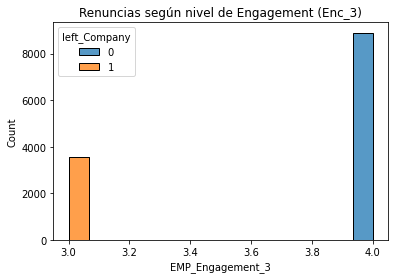

In [10]:
sns.histplot(data=ds1, x="EMP_Engagement_3", hue="left_Company", multiple="stack").set(title='Renuncias según nivel de Engagement (Enc_3)')

[Text(0.5, 1.0, 'Renuncias según nivel de Engagement (Enc_4)')]

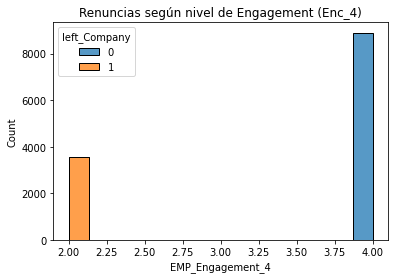

In [11]:
sns.histplot(data=ds1, x="EMP_Engagement_4", hue="left_Company", multiple="stack").set(title='Renuncias según nivel de Engagement (Enc_4)')

[Text(0.5, 1.0, 'Renuncias según nivel de Engagement (Enc_5)')]

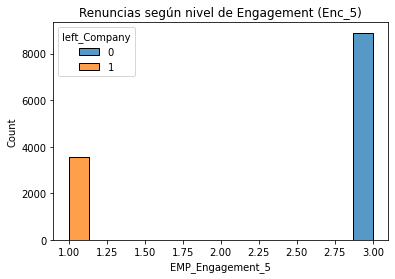

In [12]:
sns.histplot(data=ds1, x="EMP_Engagement_5", hue="left_Company", multiple="stack").set(title='Renuncias según nivel de Engagement (Enc_5)')

En segundo lugar, con el objetivo de poder aportar en el entendimiento del perfil del colaborador que renuncia, encontramos el siguiente agrupamiento de colaboradores, donde vemos que los grupos que que renuncian, estan concentrados en dos secciones bien identificadas del siguiente gráfico que muestra las renuncias seguin el promedio de horas mensuales y conteo de pasos del colaborador.

Text(0.5, 1.0, 'Renuncias segun promedio de horas mensuales y conteo de pasos')

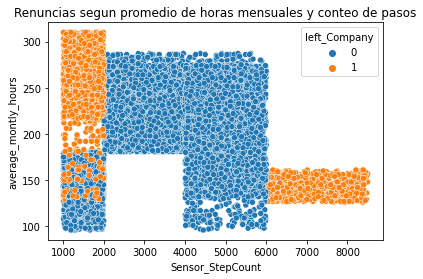

In [13]:
import matplotlib.pyplot as plt
sns.scatterplot(data=ds1, x="Sensor_StepCount", y="average_montly_hours", hue="left_Company")
plt.title('Renuncias segun promedio de horas mensuales y conteo de pasos')

Analizado las renuncias en función a la cantida de proyectos por colaborador vemos dos comportamientos muy marcados.

Por un lado a partir de los 3 proyectos como cantidad optima (nivel de renuncia del 1.99%), se visualiza que a mayor cantidad de proyectos, mayor porcentaje de renuncias. Asi cuando analizamos los colaboradores que participaron en 7 proyectos, encontramos un nivel de renuncia del 100%

Por otro lado encontramos que los colaboradores que sólo participan en 2 proyectos, se presentan como el segundo grupo con mayor porcentaje de renuncias (41.76%).

Text(0.5, 1.0, 'Renuncias segun Cantidad de Proyectos')

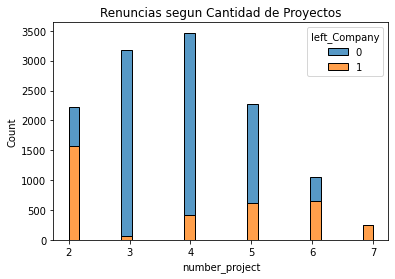

In [14]:
sns.histplot(data=ds1, x="number_project", hue="left_Company", multiple="stack")
plt.title('Renuncias segun Cantidad de Proyectos')

# Conclusiones / Insight

En función del objetivo planteado es contundente la importancia del Engagemente para poder predecir la probabilidad de renuncia de los colaboradores. 

El resto de las variables nos va a permitir bocetar un perfil de los renunciantes y finalemente evaluar si los renunciantes son los colaboradores más valiosos.

# FEATURE SELECTION

Seleccionamos las características más relevantes, basandonos en el peso, la importancia, correlación, calidad de los datos, etc.


In [15]:
ds1.shape # 12.461 registros y 62 columnas

(12461, 62)

In [16]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12461 entries, 0 to 12460
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     12461 non-null  int64  
 1   Name                                   12459 non-null  object 
 2   Department                             12461 non-null  object 
 3   GEO                                    12461 non-null  object 
 4   Role                                   12461 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          12461 non-null  int64  
 7   Critical                               476 non-null    float64
 8   Trending Perf                          12461 non-null  int64  
 9   Talent_Level                           12461 non-null  int64  
 10  Validated_Talent_Level                 12461 non-null  int64  
 11  Pe

In [17]:
ds1_num = ds1.select_dtypes('number') #Descartamos variables que no son suméricas, y que previamente se consideraron poco relavantes.
ds1_num.head()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,NaN,0,1.0,3,6,6,0.4,3.0,3.0,...,2,2,2,2,2,1,5,1841,61,9
1,4,NaN,0,NaN,3,6,6,0.4,3.0,3.0,...,5,1,1,2,4,4,1,3248,77,6
2,9,NaN,0,NaN,3,6,6,0.4,3.0,3.0,...,5,1,5,2,3,3,2,1974,64,7
3,11,NaN,0,1.0,3,6,6,0.4,3.0,3.0,...,4,5,2,1,4,5,4,2121,80,10
4,13,NaN,0,1.0,3,6,6,0.4,3.0,3.0,...,4,5,2,1,4,5,2,3056,76,9


In [18]:
ds1_num.columns

Index(['ID', 'Rising_Star', 'Will_Relocate', 'Critical', 'Trending Perf',
       'Talent_Level', 'Validated_Talent_Level', 'Percent_Remote',
       'EMP_Sat_OnPrem_1', 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3',
       'EMP_Sat_OnPrem_4', 'EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1',
       'EMP_Sat_Remote_2', 'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4',
       'EMP_Sat_Remote_5', 'EMP_Engagement_1', 'EMP_Engagement_2',
       'EMP_Engagement_3', 'EMP_Engagement_4', 'EMP_Engagement_5',
       'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left_Company', 'CSR Factor',
       'promotion_last_5years', 'LinkedIn_Hits', 'Emp_Work_Status2',
       'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5',
       'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title', 'Women_Leave',
       'Men_Leave', 'Emp_Competitive_1', 'Emp_Competitive_2',
       'Emp_Competitive_3', 'Emp_Competitive_4', 'Emp_Competitive_5',
       'Emp_Collaborative_1', 

In [20]:
ds1_num.dropna(axis=1, inplace=True) #Descartamos variables con valores NaN.


In [21]:
ds1_num = ds1_num.drop('ID', axis=1) #Descartamos campo de identación.

In [22]:
ds1_num.columns

Index(['Will_Relocate', 'Trending Perf', 'Talent_Level',
       'Validated_Talent_Level', 'Percent_Remote', 'EMP_Sat_Remote_1',
       'EMP_Sat_Remote_2', 'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4',
       'EMP_Sat_Remote_5', 'EMP_Engagement_1', 'EMP_Engagement_2',
       'EMP_Engagement_3', 'EMP_Engagement_4', 'EMP_Engagement_5',
       'last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left_Company',
       'promotion_last_5years', 'LinkedIn_Hits', 'Emp_Work_Status2',
       'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5',
       'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title',
       'Emp_Competitive_1', 'Emp_Competitive_2', 'Emp_Competitive_3',
       'Emp_Competitive_4', 'Emp_Competitive_5', 'Emp_Collaborative_1',
       'Emp_Collaborative_2', 'Emp_Collaborative_3', 'Emp_Collaborative_4',
       'Emp_Collaborative_5', 'Sensor_StepCount',
       'Sensor_Heartbeat(Average/Min)',
       'Sensor_Proximity(1-hig

In [23]:
#Diccionario
d_desc = {'Will_Relocate':'Disponibilidad de reubicarse', 'Trending Perf':'Performance', 'Talent_Level':'Talento',
       'Validated_Talent_Level':'Talento Validado', 'Percent_Remote':'Porcentaje de Remoto/Home', 'EMP_Sat_Remote_1':'Encuesta de satisfaccion en Remoto 1',
       'EMP_Sat_Remote_2':'Encuesta de satisfaccion en Remoto 2', 'EMP_Sat_Remote_3':'Encuesta de satisfaccion en Remoto 3', 'EMP_Sat_Remote_4':'Encuesta de satisfaccion en Remoto 4',
       'EMP_Sat_Remote_5':'Encuesta de satisfaccion en Remoto 5', 'EMP_Engagement_1':'Resultado Engagement del Empleado 1', 'EMP_Engagement_2':'Resultado Engagement del Empleado 2',
       'EMP_Engagement_3':'Resultado Engagement del Empleado 3', 'EMP_Engagement_4':'Engagement del Empleado 4', 'EMP_Engagement_5':'Resultado Engagement del Empleado 5',
       'last_evaluation':'Última Evaluación', 'number_project':'Cantidad de Proyectos anuales', 'average_montly_hours':'Horas promedio al mes',
       'time_spend_company':'Antiguedad', 'Work_accident':'Accidentes de trabajo', 'left_Company':'Target = Renunció o no',
       'promotion_last_5years':'Promovido en los ultimos 5 años ', 'LinkedIn_Hits':'Conteo de Linkedin', 'Emp_Work_Status2':'Status del empleado 2',
       'Emp_Work_Status_3':'Status del empleado 3', 'Emp_Work_Status_4':'Status del empleado 4', 'Emp_Work_Status_5':'Status del empleado 5',
       'Emp_Identity':'Identificación con la empresa', 'Emp_Role':'Rol', 'Emp_Position':'Posición', 'Emp_Title':'Titulo',
       'Emp_Competitive_1':'Nivel De competencia 1', 'Emp_Competitive_2':'Nivel De competencia 2', 'Emp_Competitive_3':'Nivel De competencia 3',
       'Emp_Competitive_4':'Nivel De competencia 4', 'Emp_Competitive_5':'Nivel De competencia 5', 'Emp_Collaborative_1':'Nivel de Colaboración 1',
       'Emp_Collaborative_2':'Nivel de Colaboración 2', 'Emp_Collaborative_3':'Nivel de Colaboración 3', 'Emp_Collaborative_4':'Nivel de Colaboración 4',
       'Emp_Collaborative_5':'Nivel de Colaboración 5', 'Sensor_StepCount':'Conteo de pasos',
       'Sensor_Heartbeat(Average/Min)':'Sensor de pulsaciones',
       'Sensor_Proximity(1-highest/10-lowest)':'Sensor de proximidad'}

In [30]:
# Generamos features y target
X = ds1_num.drop('left_Company', axis=1)
y = ds1_num['left_Company']

# ARBOL DE DECISIÓN

In [ ]:
from sklearn.model_selection import train_test_split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de Entrenamiento:', X_train.shape)
print('Tamaño del set de Testeo:', X_test.shape)

Tamaño del set de Entrenamiento: (9968, 43)
Tamaño del set de Testeo: (2493, 43)


In [ ]:
100*y_train.sum()/len(y_train) # Porcentaje de True en train

28.62158908507223

In [ ]:
100*y_test.sum()/len(y_test) # Porcentaje de True en test

28.60008022462896

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Modelo

In [ ]:
# Instanciar el objeto/modelo
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

### ENTRENAMIENTO

In [ ]:
# Ajustar el modelo con los datos
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

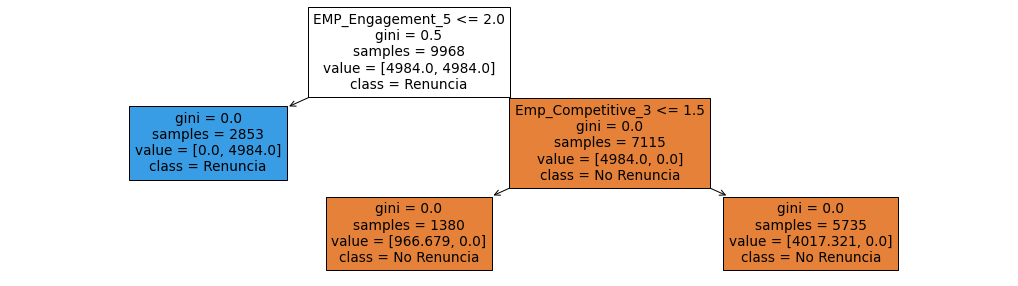

In [ ]:
# Graficamos el Arbol
from sklearn import tree
fig = plt.figure(figsize=(18,5))
_ = tree.plot_tree(tree_model,feature_names = list(ds1_num),class_names=['No Renuncia','Renuncia'],
                   filled=True)

### PREDICCION

In [ ]:
# predicciones
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [ ]:
X_test.shape, y_test.shape

((2493, 43), (2493,))

In [ ]:
y_pred.shape

(2493,)

In [ ]:
X_test

,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
12020,1,3,6,6,0.8,5,5,4,5,4,...,5,5,3,1,4,4,5,4262,75,3
278,1,3,6,6,0.4,2,3,2,3,2,...,3,4,4,1,1,4,3,1668,71,9
4758,0,3,6,6,0.8,5,5,4,5,4,...,3,2,1,4,3,1,1,1249,86,3
11105,1,3,6,6,0.8,3,5,4,4,5,...,4,4,5,1,5,2,4,1629,89,6
11022,0,3,6,6,0.8,3,5,4,4,5,...,3,2,1,2,1,1,3,4345,73,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726,1,3,6,6,0.8,3,5,4,4,5,...,5,5,5,2,4,2,4,5349,78,2
6639,0,3,6,6,0.4,2,3,2,3,2,...,5,3,3,2,2,1,3,2338,77,10
119,0,3,6,6,0.4,2,3,2,3,2,...,1,4,3,2,3,1,5,2429,79,7
6130,1,3,6,6,0.4,2,3,2,3,2,...,2,1,1,2,4,3,1,1077,87,6


In [ ]:
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test[:10].values

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

### ARBOL DE DECISIÓN - EVALUACIÓN

In [ ]:
# Evaluacion 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Evaluamos el modelo en el conjunto de testeo:
recall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 1.0000
Precision: 1.0000
F1: 1.0000
Accuracy: 1.0000


In [ ]:
# Evaluamos el modelo ya entrenado en el conjunto de testeo
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TEST:
Recall: 1.0000
Precision: 1.0000
F1: 1.0000
Accuracy: 1.0000


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1780,    0],
       [   0,  713]])

In [ ]:
y_test.value_counts()

0    1780
1     713
Name: left_Company, dtype: int64

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
pd.Series(y_pred).value_counts()

0    1780
1     713
dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1780
           1       1.00      1.00      1.00       713

    accuracy                           1.00      2493
   macro avg       1.00      1.00      1.00      2493
weighted avg       1.00      1.00      1.00      2493



In [ ]:
proba = tree_model.predict_proba(X_test)

proba

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
tree_model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.93018951e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
df_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia

,Variable,Importancia
14,EMP_Engagement_5,1.000000e+00
33,Emp_Competitive_4,3.930190e-14
0,Will_Relocate,0.000000e+00
31,Emp_Competitive_2,0.000000e+00
24,Emp_Work_Status_4,0.000000e+00
25,Emp_Work_Status_5,0.000000e+00
26,Emp_Identity,0.000000e+00
27,Emp_Role,0.000000e+00
28,Emp_Position,0.000000e+00
29,Emp_Title,0.000000e+00


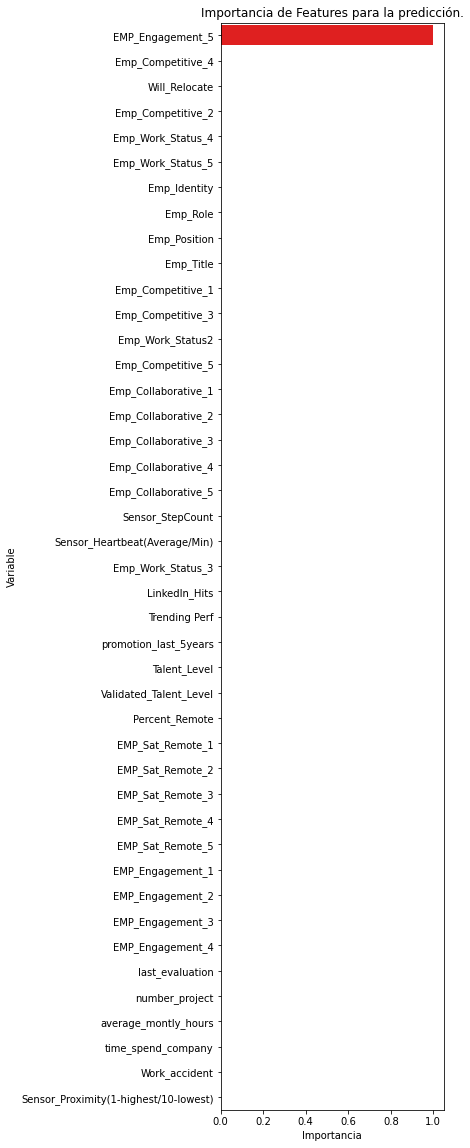

In [ ]:
plt.figure(figsize=(4,20))

values = df_importancia.Importancia    

sns.barplot(y=df_importancia.Variable,
            x=values,
            palette = ['green' if (x < max(values)) else 'red' for x in values ]
           ).set(title='Importancia de Features para la predicción.')

plt.show()

# REGRESION LOGISTICA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(data = X1, columns= X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)



print('Tamaño del set de Entrenamiento:', X_train.shape)
print('Tamaño del set de Testeo:', X_test.shape)

Tamaño del set de Entrenamiento: (9968, 43)
Tamaño del set de Testeo: (2493, 43)


In [ ]:
# Modelo
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# Evaluamos
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1780
           1       0.29      1.00      0.44       713

    accuracy                           0.29      2493
   macro avg       0.14      0.50      0.22      2493
weighted avg       0.08      0.29      0.13      2493



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


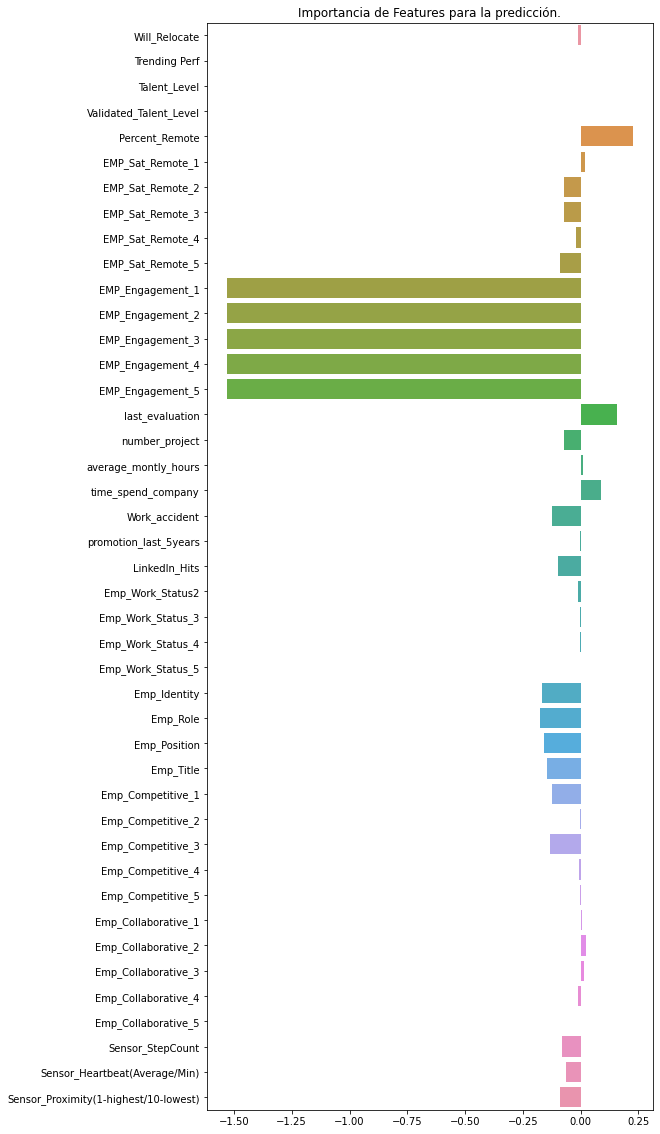

In [ ]:
plt.figure(figsize=(8,20))

values = pd.Series(clf.coef_.flat)  

sns.barplot(y=X1.columns,
            x=values,
           ).set(title='Importancia de Features para la predicción.')

plt.show()

## CONCLUSIONES - RESULTADO DE LOS MODELOS

ARBOL DE DECISIÓN

1.   El modelo predice con mucha certeza la probabilidad de renuncia del colaborador, en función al dataset en cuestión.
2.   La variable más importante es **EMP_Engagement_5**

REGRESION LOGISTICA


1.   Elemento de lista
2.   La variables más importantes son **EMP_Engagement_5, EMP_Engagement_4, EMP_Engagement_3, EMP_Engagement_2 y EMP_Engagement_1**.



Ambos modelos ofrecen escelentes resultados de predicción; 1780 y 713; con niveles de prediccion y Accuracy del 100%
En comparación la regresion destaca la importancia simila de los 5 campos de **EMP_Engagement_**; lo que guarda lógica puesto que se trata de los resultados de las mismas encuestas, pero en distintas instancias o momentos. 

El arbol de decisión simplifica el análisis, pero no devela la importancia similar de los resultados de las otras encuestas, que aqui vemos como variables distintas.

